In [2]:
import numpy as np
from scipy.integrate import solve_ivp
from SALib.sample import saltelli, sobol, fast_sampler
from SALib.analyze import sobol, fast
import seaborn as sns
import SALib
import matplotlib.pyplot as plt
import math
from scipy.optimize import fsolve
from scipy.constants import N_A

ModuleNotFoundError: No module named 'numpy'

In [ ]:
Target_cell_number = 2e5
well_size = 150e-6
r_ab = 1.25e-6 # in cm
t_end = 60*60*10
t = np.geomspace(1e-10, t_end, 20)
tspan = [1e-10, t_end]
z0 = [0, 0, 0]
z01 = [0, 0]
T_cell_radius = 5e-4 #cm
T_cell_surface_area = 4*math.pi*((T_cell_radius)**2)
reaction_volume = (2/3)*math.pi*((r_ab)**3)
tumour_cell_radius = 8e-6
tumour_cell_surface_area = 4*math.pi*((tumour_cell_radius)**2)

In [ ]:
sigma = well_size*N_A/Target_cell_number

def A1_steady_state(x, Ainit, k1, koff, k2, rtot, dummy):
    k1 = k1/sigma
    Atot = sigma*Ainit
    express = 2*k1*(rtot - x - 2*(k2*x*(rtot-x)/(2*(koff + k2*x))))*(Atot - x - (k2*x*(rtot-x)/(2*(koff + k2*x)))) -koff*x - k2*x*(rtot - x - 2*(k2*x*(rtot-x)/(2*(koff + k2*x)))) +2*koff*(k2*x*(rtot-x)/(2*(koff + k2*x)))

    return express

def A2_steady_state(x, k2, koff, rtot, dummy):
    express = k2*x*(rtot-x)/(2*(koff + k2*x))

    return express


In [ ]:

problem1 = {
    'num_vars': 5,
    'names': ['rtot', 'kon', 'D', 'koff', 'dummy'],
    'bounds': [[1e3, 1e7],
               [1e4, 1e6],
               [1e-15, 1e-13],
               [1e-6, 1e-1],
               [1, 1000]]
}

problem2 = {
    'num_vars': 4,
    'names': ['kon', 'k2', 'koff', 'dummy'],
    'bounds': [[1e3, 1e7],
               [1e4, 1e6],
               [1e-6, 1e-1],
               [1, 1000]]
}


vals = SALib.sample.sobol.sample(problem1, 16384)
Y_ag1 = np.zeros(len(vals))
Y_ag2 = np.zeros(len(vals))
Y_ab = np.zeros(len(vals))
indicies_ag1 = []
indicies_ag2 = []
indicies_ab = []
A0s = [1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
Y = np.zeros(len(vals))
indicies = []
indicies_1 = []

In [ ]:
65536/4

16384.0

In [ ]:
sol_holder = []
for Ainit in A0s:
    print(Ainit)
    for i, params in enumerate(vals):
     
        rtot = params[0]
        kon = params[1]
        D = params[2]
        koff = params[3]
        dummy = params[4]

        k2 = 4*D/tumour_cell_surface_area

        if Ainit < 1e-8:
            guess = 0
        else:
            guess = 0

        A1_st = fsolve(A1_steady_state, [guess], args=(Ainit, kon, koff, k2, rtot, dummy))
        A2_st = A2_steady_state(A1_st, k2, koff, rtot, dummy)
        if (A1_st < 0) or (A2_st < 0) :
            print('negative')
        
        if ((A1_st + 2*A2_st) > rtot):
            print('blown up')
        Ag =(A1_st + 2*A2_st)/rtot
        Y[i] = Ag
    
    Si = sobol.analyze(problem1, Y, print_to_console=True)
    indicies.append(Si['ST'])
    indicies_1.append(Si['S1'])


1e-11
             ST   ST_conf
rtot   0.876641  0.264386
kon    0.053651  0.029786
D      0.039341  0.013469
koff   0.269557  0.103097
dummy  0.000000  0.000000
             S1   S1_conf
rtot   0.491745  0.125641
kon    0.003946  0.003627
D      0.002456  0.003482
koff   0.001950  0.006040
dummy  0.000000  0.000000
                     S2   S2_conf
(rtot, kon)    0.048248  0.133215
(rtot, D)      0.058399  0.138812
(rtot, koff)   0.222367  0.213054
(rtot, dummy)  0.024346  0.135692
(kon, D)      -0.004200  0.005441
(kon, koff)    0.001118  0.012448
(kon, dummy)  -0.003678  0.005109
(D, koff)     -0.000327  0.004292
(D, dummy)    -0.000923  0.004641
(koff, dummy)  0.003245  0.010365
1e-10
             ST   ST_conf
rtot   0.982948  0.059162
kon    0.043263  0.007794
D      0.039618  0.006588
koff   0.165199  0.028788
dummy  0.000000  0.000000
             S1   S1_conf
rtot   0.748030  0.054551
kon    0.004787  0.004193
D      0.003995  0.003551
koff   0.003166  0.006626
dummy  0.000000 

/opt/homebrew/lib/python3.10/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


             ST   ST_conf
rtot   0.344683  0.033788
kon    0.288510  0.023327
D      0.281849  0.020140
koff   0.335535  0.029919
dummy  0.000000  0.000000
             S1   S1_conf
rtot   0.235309  0.028601
kon    0.173690  0.019339
D      0.177193  0.019680
koff   0.177588  0.016094
dummy  0.000000  0.000000
                     S2   S2_conf
(rtot, kon)    0.025608  0.061270
(rtot, D)      0.018707  0.064054
(rtot, koff)   0.043533  0.057668
(rtot, dummy) -0.001258  0.057052
(kon, D)       0.031462  0.038533
(kon, koff)    0.043490  0.029898
(kon, dummy)  -0.000288  0.027896
(D, koff)      0.041087  0.036061
(D, dummy)    -0.007394  0.032889
(koff, dummy)  0.004721  0.016574
1e-07
             ST   ST_conf
rtot   0.542144  0.139819
kon    0.311667  0.060849
D      0.272490  0.047856
koff   0.302790  0.067442
dummy  0.000000  0.000000
             S1   S1_conf
rtot   0.259573  0.065741
kon    0.118356  0.023149
D      0.123383  0.023909
koff   0.091332  0.018778
dummy  0.000000  0.000

KeyboardInterrupt: 

7


Text(0, 0.5, 'Total Order Sobol Indicies')

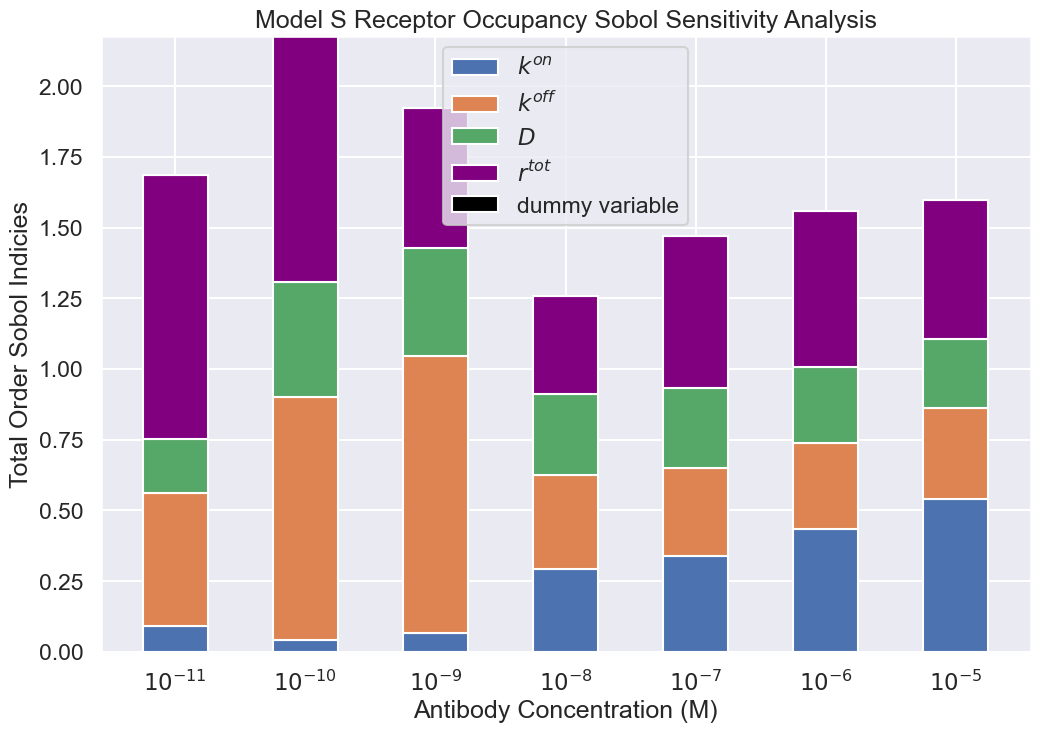

In [ ]:
kon_si = np.zeros(len(A0s))
koff_si = np.zeros(len(A0s))
D_si = np.zeros(len(A0s))
rtot_si = np.zeros(len(A0s))
dummy_si = np.zeros(len(A0s))

for i in range(len(indicies)):
    vals = indicies[i]
    rtot_si[i] = vals[0]
    kon_si[i] = vals[1]
    D_si[i] = vals[2]
    koff_si[i] = vals[3]
    dummy_si[i] = vals[4]

print(len(indicies))
ab_conc = ( r'$10^{-11}$', r'$10^{-10}$', r'$10^{-9}$', r'$10^{-8}$', r'$10^{-7}$', r'$10^{-6}$', r'$10^{-5}$')

param_indicies = {
    r"$k^{on}$": kon_si,
    r"$k^{off}$": koff_si,
    r"$D$": D_si,
    
}

sns.set_theme()
sns.set_context("talk")

width = 0.5
fig, ax = plt.subplots(figsize=(12,8))
bottom = np.zeros(7)

for boolean, param_indicie in param_indicies.items():
    p = ax.bar(ab_conc, param_indicie, width, label=boolean, bottom=bottom)
    bottom += param_indicie
ax.bar(ab_conc, rtot_si, width, label=r'$r^{tot}$', bottom= bottom, color='purple')
bottom+= rtot_si
ax.bar(ab_conc, dummy_si, width, label='dummy variable', bottom=bottom, color='black')
ax.set_title('Model S Receptor Occupancy Sobol Sensitivity Analysis')
ax.legend(loc='best')
ax.set_xlabel('Antibody Concentration (M)')
ax.set_ylabel('Total Order Sobol Indicies')
#plt.savefig('/Users/lukeheirene/ADCC-Project/Figures/model_s_bispecific_total_ab_sensiv_analysis.png')

7


Text(0, 0.5, 'Total Order Sobol Indicies')

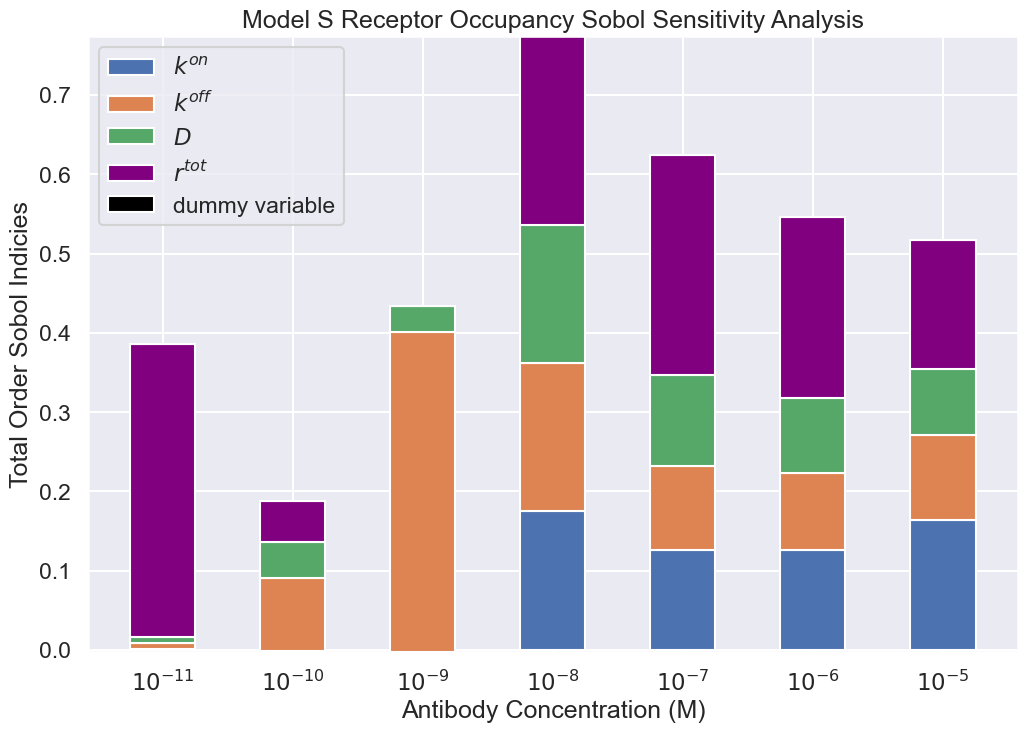

In [ ]:
kon_si = np.zeros(len(A0s))
koff_si = np.zeros(len(A0s))
D_si = np.zeros(len(A0s))
rtot_si = np.zeros(len(A0s))
dummy_si = np.zeros(len(A0s))

for i in range(len(indicies_1)):
    vals = indicies_1[i]
    rtot_si[i] = vals[0]
    kon_si[i] = vals[1]
    D_si[i] = vals[2]
    koff_si[i] = vals[3]
    dummy_si[i] = vals[4]

print(len(indicies_1))
ab_conc = ( r'$10^{-11}$', r'$10^{-10}$', r'$10^{-9}$', r'$10^{-8}$', r'$10^{-7}$', r'$10^{-6}$', r'$10^{-5}$')

param_indicies = {
    r"$k^{on}$": kon_si,
    r"$k^{off}$": koff_si,
    r"$D$": D_si,
    
}

sns.set_theme()
sns.set_context("talk")

width = 0.5
fig, ax = plt.subplots(figsize=(12,8))
bottom = np.zeros(7)

for boolean, param_indicie in param_indicies.items():
    p = ax.bar(ab_conc, param_indicie, width, label=boolean, bottom=bottom)
    bottom += param_indicie
ax.bar(ab_conc, rtot_si, width, label=r'$r^{tot}$', bottom= bottom, color='purple')
bottom+= rtot_si
ax.bar(ab_conc, dummy_si, width, label='dummy variable', bottom=bottom, color='black')
ax.set_title('Model S Receptor Occupancy Sobol Sensitivity Analysis')
ax.legend(loc='best')
ax.set_xlabel('Antibody Concentration (M)')
ax.set_ylabel('Total Order Sobol Indicies')
#plt.savefig('/Users/lukeheirene/ADCC-Project/Figures/model_s_bispecific_total_ab_sensiv_analysis.png')